In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install seaborn

In [4]:
!pip install xgboost

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance


In [6]:
df = pd.read_csv(r"C:\Users\teja9\Desktop\Intrusion-Detection-System-Using-Machine-Learning-main\data\CICIDS2017_sample.csv")
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [7]:
df.Label.value_counts()

BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

In [8]:
# Randomly sample instances from majority classes
df_minor = df[(df['Label'] == 'WebAttack')|(df['Label'] == 'Bot')|(df['Label'] == 'Infiltration')]
df_BENIGN = df[(df['Label'] == 'BENIGN')]
df_BENIGN  = df_BENIGN.sample(n = None,frac = 0.01, replace = False,weights = None,axis = 0)
df_DoS = df[(df['Label'] == 'DoS')]
df_DoS  = df_DoS.sample(n = None,frac = 0.05, replace = False,weights = None,axis = 0)
df_PortScan = df[(df['Label'] == 'PortScan')]
df_PortScan  = df_PortScan.sample(n = None,frac = 0.05, replace = False,weights = None,axis = 0)                            
df_BruteForce = df[(df['Label'] == 'BruteForce')]
df_BruteForce  = df_BruteForce.sample(n = None,frac = 0.2, replace = False,weights = None,axis = 0)                             

In [9]:
df_s = df_BENIGN.append(df_DoS).append(df_PortScan).append(df_BruteForce).append(df_minor)

In [10]:
df_s

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
30689,4,2,0,31,0,31,0,15.50,21.920310,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
26970,48,2,0,4,0,2,2,2.00,0.000000,0,...,24,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
34036,60958,2,2,74,202,37,37,37.00,0.000000,101,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
27182,7878248,2,2,90,302,45,45,45.00,0.000000,152,...,32,71283.0,0.0,71283,71283,7776094.0,0.0,7776094,7776094,BENIGN
7613,23,1,1,0,0,0,0,0.00,0.000000,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,5005388,5,3,599,2021,599,0,119.80,267.880944,2021,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack
31735,5016759,5,5,599,4149,599,0,119.80,267.880944,2701,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack
31738,5009163,4,4,599,2021,599,0,149.75,299.500000,2021,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack
31739,73,1,1,0,0,0,0,0.00,0.000000,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,WebAttack


In [11]:
df_s = df_s.sort_index()
df_s

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
8,61017,4,2,172,198,43,43,43.000000,0.000000,99,...,20,0.00000,0.0000,0,0,0.0,0.000,0,0,BENIGN
144,115930807,20,18,1294,5762,842,0,64.700000,189.825987,2021,...,20,27598.33333,18931.3679,87710,21954,9633302.0,1272936.684,10000000,5591186,BENIGN
210,13111,3,4,26,11601,20,0,8.666667,10.263203,8675,...,20,0.00000,0.0000,0,0,0.0,0.000,0,0,DoS
223,68223,3,6,26,11601,20,0,8.666667,10.263203,5840,...,20,0.00000,0.0000,0,0,0.0,0.000,0,0,DoS
229,81363729,4,0,24,0,6,6,6.000000,0.000000,0,...,20,3004.00000,0.0000,3004,3004,81400000.0,0.000,81400000,81400000,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55980,20197856,2,0,0,0,0,0,0.000000,0.000000,0,...,32,0.00000,0.0000,0,0,20200000.0,0.000,20200000,20200000,DoS
56077,10024527,2,0,0,0,0,0,0.000000,0.000000,0,...,32,0.00000,0.0000,0,0,10000000.0,0.000,10000000,10000000,DoS
56262,107640365,2,1,288,6,288,0,144.000000,203.646753,6,...,32,0.00000,0.0000,0,0,108000000.0,0.000,108000000,108000000,DoS
56273,11770032,9,6,419,11632,419,0,46.555556,139.666667,5792,...,32,961.00000,0.0000,961,961,6765292.0,0.000,6765292,6765292,DoS


In [29]:
df = pd.read_csv(r"C:\Users\teja9\Desktop\Intrusion-Detection-System-Using-Machine-Learning-main\data\CICIDS2017_sample_km.csv")
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7.499999e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7.249999e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,4.171167e-02,0.000018,0.000010,4.643411e-05,3.083364e-06,0.024134,0.000000,0.020165,0.037594,0.103482,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
26796,4.180643e-02,0.000018,0.000017,4.643411e-05,6.329973e-06,0.024134,0.000000,0.020165,0.037594,0.138300,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
26797,4.174313e-02,0.000014,0.000014,4.643411e-05,3.083364e-06,0.024134,0.000000,0.025207,0.042032,0.103482,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
26798,7.166666e-07,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [12]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index # the numeric features in the DataFrame by selecting the columns whose data type is not 'object'
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0) # filling missing value with zero


In [13]:
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3.333333e-08,0.000144,0.000000,0.000013,0.000000,0.001327,0.003026,0.003114,0.002508,0.000000,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
1,1.186475e-03,0.006494,0.006277,0.000462,0.004923,0.024401,0.000000,0.004849,0.015804,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
2,9.906083e-04,0.003175,0.002835,0.000408,0.002094,0.024401,0.000000,0.008555,0.022149,0.248968,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
3,1.196475e-03,0.006061,0.005568,0.000454,0.004990,0.024401,0.000000,0.005093,0.016339,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
4,1.197875e-03,0.006927,0.005973,0.000464,0.005125,0.024401,0.000000,0.004572,0.015330,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,1.950000e-06,0.000144,0.000202,0.000022,0.000011,0.001370,0.016137,0.005386,0.000000,0.009972,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
56657,1.110733e-03,0.000144,0.000202,0.000033,0.000022,0.002012,0.023701,0.007911,0.000000,0.020719,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
56658,9.589745e-02,0.000577,0.000405,0.000157,0.000164,0.019264,0.000000,0.015149,0.028548,0.303043,...,0.533333,0.000009,0.0,0.000009,0.000009,0.054652,0.0,0.054652,0.054652,DoS
56659,9.589756e-02,0.001010,0.000607,0.000145,0.000541,0.017808,0.000000,0.008753,0.020864,0.497937,...,0.533333,0.000009,0.0,0.000009,0.000009,0.054648,0.0,0.054648,0.054648,DoS


# split train set and test set

In [14]:
labelencoder = LabelEncoder() # convert the categorical target variable into numerical labels
df.iloc[:,-1] = labelencoder.fit_transform(df.iloc[:,-1])
X = df.drop(['Label'],axis = 1).values
y = df.iloc[:,-1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [15]:
X_train.shape

(45328, 77)

In [16]:
pd.Series(y_train).value_counts()

0    18184
3    15228
5     6357
2     2213
6     1744
1     1573
4       29
dtype: int64

# OverSampling by SMOTE

In [18]:
!pip install imblearn

In [19]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500}) # Create 1500 samples for th

In [20]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [21]:
pd.Series(y_train).value_counts()

0    18184
3    15228
5     6357
2     2213
6     1744
1     1573
4     1500
dtype: int64

# Machine learning model training
Training four base learners: decision tree, random forest, extra trees, XGBoost

# Decision Tree

In [22]:
dt = DecisionTreeClassifier(random_state = 0)

In [23]:
dt.fit(X_train,y_train)
dt_score = dt.score(X_test,y_test)
y_predict = dt.predict(X_test)
y_true = y_test
print("Accuracy of DT :"+(str(dt_score)))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print("Recall of DT :"+(str(recall)))
print("F1-Score of DT :"+(str(fscore)))

Accuracy of DT :0.995764581311215
Precision of DT: 0.995747807352199
Recall of DT :0.995764581311215
F1-Score of DT :0.9957506435154665


In [24]:
print(classification_report(y_true,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4547
           1       0.98      0.98      0.98       393
           2       0.99      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       0.83      0.71      0.77         7
           5       1.00      1.00      1.00      1589
           6       0.99      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       0.97      0.95      0.96     11333
weighted avg       1.00      1.00      1.00     11333



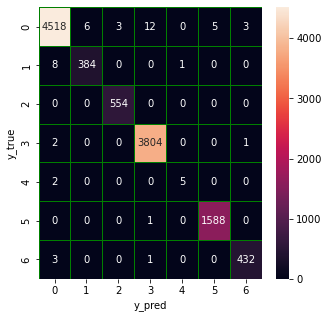

In [25]:
cm = confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="green",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [26]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

In [29]:
dt_train

array([5, 3, 5, ..., 4, 4, 4])

In [30]:
dt_test

array([0, 1, 3, ..., 0, 3, 3])

**Random Forest**

Accuracy of DT :0.9949704403070678
Precision of DT: 0.9949924853455094
Recall of DT :0.9949704403070678
F1-Score of DT :0.9949524588168017


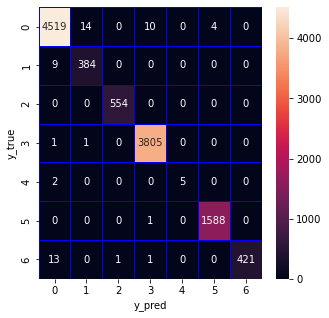

In [34]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score = rf.score(X_test,y_test)
y_predict = rf.predict(X_test)
y_true = y_test
print("Accuracy of DT :"+(str(rf_score)))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print("Recall of DT :"+(str(recall)))
print("F1-Score of DT :"+(str(fscore)))
cm = confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="blue",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [33]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

**Extra Tree**

Accuracy of DT :0.9949704403070678
Precision of DT: 0.9925098084906409
Recall of DT :0.9924997794052767
F1-Score of DT :0.9924905643690018


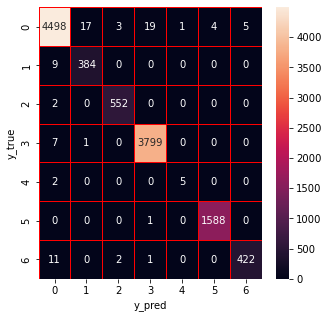

In [36]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score = et.score(X_test,y_test)
y_predict = et.predict(X_test)
y_true = y_test
print("Accuracy of DT :"+(str(rf_score)))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print("Recall of DT :"+(str(recall)))
print("F1-Score of DT :"+(str(fscore)))
cm = confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.8,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [37]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.9948822024177182
Precision of XGBoost: 0.9948876431050118
Recall of XGBoost: 0.9948822024177182
F1-score of XGBoost: 0.994875203674509
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4547
           1       0.99      0.97      0.98       393
           2       1.00      1.00      1.00       554
           3       0.99      1.00      1.00      3807
           4       0.71      0.71      0.71         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.98      0.99       436

    accuracy                           0.99     11333
   macro avg       0.96      0.95      0.95     11333
weighted avg       0.99      0.99      0.99     11333



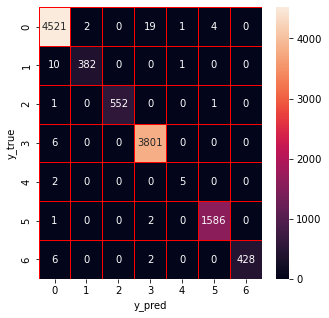

In [38]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [39]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

## Stacking model construction (ensemble for 4 base learners)

In [40]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,5,5,5,5
1,3,3,3,3
2,5,5,5,5
3,3,3,3,3
4,2,2,2,2


In [41]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [42]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [43]:
stk = xgb.XGBClassifier().fit(x_train, y_train)

Accuracy of Stacking: 0.995764581311215
Precision of Stacking: 0.995763316434968
Recall of Stacking: 0.995764581311215
F1-score of Stacking: 0.9957463405651271
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4547
           1       0.98      0.98      0.98       393
           2       0.99      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       0.99      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       0.99      0.95      0.97     11333
weighted avg       1.00      1.00      1.00     11333



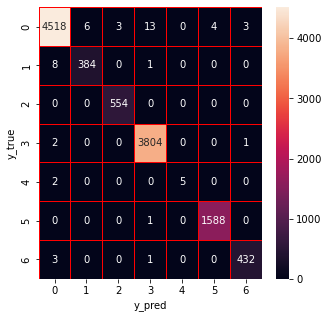

In [44]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Feature Selection
Feature importance

In [45]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [46]:
# calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [48]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))


Features sorted by their score:
[(0.1191, 'Bwd Packet Length Std'), (0.0961, 'Bwd Packet Length Min'), (0.0619, 'Average Packet Size'), (0.05, 'Init_Win_bytes_backward'), (0.0427, 'Init_Win_bytes_forward'), (0.0364, 'PSH Flag Count'), (0.0338, 'Avg Bwd Segment Size'), (0.0336, 'Bwd Packets/s'), (0.0293, 'Packet Length Std'), (0.0278, 'Bwd Packet Length Mean'), (0.0237, 'Bwd Header Length'), (0.0232, 'Packet Length Mean'), (0.0199, 'Fwd Header Length.1'), (0.0181, 'Bwd Packet Length Max'), (0.0176, 'min_seg_size_forward'), (0.0175, 'Fwd Header Length'), (0.016, 'Max Packet Length'), (0.0158, 'act_data_pkt_fwd'), (0.0156, 'Min Packet Length'), (0.0153, 'ACK Flag Count'), (0.0139, 'Subflow Bwd Bytes'), (0.0133, 'Total Length of Fwd Packets'), (0.0128, 'Packet Length Variance'), (0.0114, 'Total Fwd Packets'), (0.0112, 'Idle Max'), (0.0108, 'Total Length of Bwd Packets'), (0.0103, 'Fwd IAT Max'), (0.0096, 'Fwd Packet Length Max'), (0.0094, 'Fwd Packet Length Mean'), (0.0094, 'Fwd IAT Mean')

In [49]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)
len(f_list)

77

In [50]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break        

In [51]:
X_fs = df[fs].values
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
X_train.shape

(45328, 39)

In [52]:
pd.Series(y_train).value_counts()

0    18184
3    15228
5     6357
2     2213
6     1744
1     1573
4       29
dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500})

In [54]:
X_train, y_train = smote.fit_resample(X_train, y_train)
pd.Series(y_train).value_counts()

0    18184
3    15228
5     6357
2     2213
6     1744
1     1573
4     1500
dtype: int64

# Machine learning model training after feature selection

Accuracy of DT: 0.9954116297538163
Precision of DT: 0.9955165813104128
Recall of DT: 0.9954116297538163
F1-score of DT: 0.9954457937816882
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4547
           1       0.99      0.98      0.98       393
           2       0.99      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       0.60      0.86      0.71         7
           5       1.00      1.00      1.00      1589
           6       0.99      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       0.94      0.97      0.95     11333
weighted avg       1.00      1.00      1.00     11333



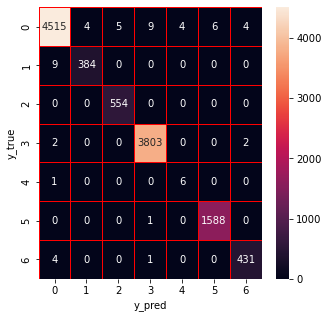

In [55]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [56]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.9970881496514603
Precision of RF: 0.9970864368208947
Recall of RF: 0.9970881496514603
F1-score of RF: 0.9970698802161622
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4547
           1       0.99      0.98      0.99       393
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       1.00      0.95      0.97     11333
weighted avg       1.00      1.00      1.00     11333



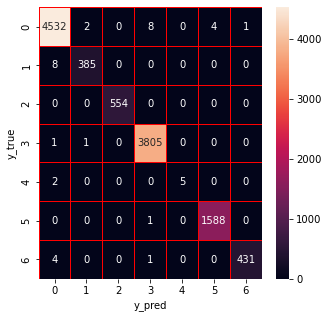

In [57]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [58]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.9949704403070678
Precision of ET: 0.99495510916778
Recall of ET: 0.9949704403070678
F1-score of ET: 0.9949572461775884
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4547
           1       0.97      0.97      0.97       393
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       0.83      0.71      0.77         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.99      0.99       436

    accuracy                           0.99     11333
   macro avg       0.97      0.95      0.96     11333
weighted avg       0.99      0.99      0.99     11333



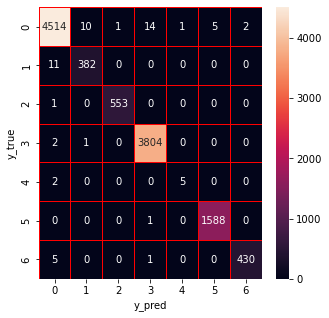

In [59]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [60]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.9948822024177182
Precision of XGBoost: 0.994876410889734
Recall of XGBoost: 0.9948822024177182
F1-score of XGBoost: 0.9948661528901783
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4547
           1       1.00      0.98      0.99       393
           2       1.00      1.00      1.00       554
           3       0.99      1.00      1.00      3807
           4       0.83      0.71      0.77         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.98      0.99       436

    accuracy                           0.99     11333
   macro avg       0.97      0.95      0.96     11333
weighted avg       0.99      0.99      0.99     11333



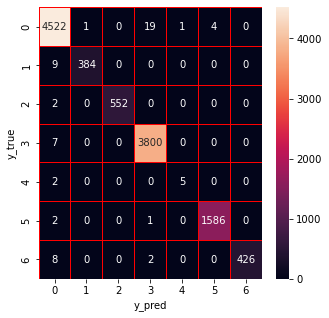

In [61]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [62]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

# Stacking model construction

In [63]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,5,5,5,5
1,3,3,3,3
2,5,5,5,5
3,3,3,3,3
4,2,2,2,2


In [64]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [65]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.9953233918644666
Precision of Stacking: 0.9953200557503513
Recall of Stacking: 0.9953233918644666
F1-score of Stacking: 0.995302201590043
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4547
           1       0.99      0.97      0.98       393
           2       1.00      1.00      1.00       554
           3       0.99      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.98      0.99       436

    accuracy                           1.00     11333
   macro avg       1.00      0.95      0.97     11333
weighted avg       1.00      1.00      1.00     11333



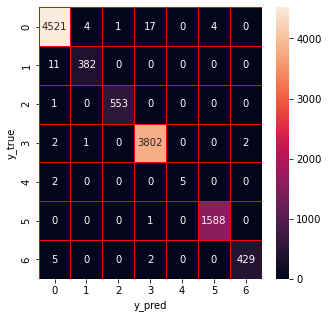

In [67]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()